In [46]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%pdb 1


Automatic pdb calling has been turned ON


Please note that this notebook is most likely going to cause a stuck process. So if you are going to run it, please make sure to restart your jupyter notebook as soon as you completed running it.

The bug happens inside the `fastText` library, which we have no control over. You can check the status of this issue: [here](https://github.com/fastai/fastai/issues/754) and [here](https://github.com/facebookresearch/fastText/issues/618#issuecomment-419554225).

For the future, note that there're 3 separate implementations of fasttext, perhaps one of them works:
https://github.com/facebookresearch/fastText/tree/master/python
https://pypi.org/project/fasttext/
https://radimrehurek.com/gensim/models/fasttext.html#module-gensim.models.fasttext

## Translation files

In [1]:
from fastai.text import *

In [0]:
!curl -L -O https://github.com/ty2000/github_summary/releases/download/0.1/github-issues.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   608    0   608    0     0   2909      0 --:--:-- --:--:-- --:--:--  2895
100  979M  100  979M    0     0  70.1M      0  0:00:13  0:00:13 --:--:-- 72.3M


In [0]:
!unzip *zip

Archive:  github-issues.zip
  inflating: github_issues.csv       


In [0]:
!ls -l

total 3788908
-rw-r--r-- 1 root root 2852401417 Jan 17  2018 github_issues.csv
-rw-r--r-- 1 root root 1027424178 Apr 25 13:29 github-issues.zip
drwxr-xr-x 1 root root       4096 Apr  4 20:20 sample_data


In [0]:
!head -n 10 github_issues.csv

issue_url,issue_title,body
"""https://github.com/zhangyuanwei/node-images/issues/123""",can't load the addon. issue to: https://github.com/zhangyuanwei/node-images/issues error: /lib64/libc.so.6: version glibc_2.14' not found required by /usr/local/app/taf/fileserver.fileserver/bin/src/node_modules/images/bindings/linux/x64/8.0.0/binding.node,can't load the addon. issue to: https://github.com/zhangyuanwei/node-images/issues error: /lib64/libc.so.6: version glibc_2.14' not found required by /usr/local/app/taf/fileserver.fileserver/bin/src/node_modules/images/bindings/linux/x64/8.0.0/binding.node 有低点的版本，不需要glibc_2.14的吗
"""https://github.com/Microsoft/pxt/issues/2543""",hcl accessibility a11yblocking a11ymas mas4.2.10 hcl-makecode win10-edge -title screen reader-help-javascript-call a function narrator focus does not moving to expand side a documentation button after pressing enter on collapse side a documentation button.,user experience: user who depends on screen reader will get confuse

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('github_issues.csv').sample(n=100000)

In [0]:
df.describe()

,issue_url,issue_title,body
count,100000,100000,100000
unique,99966,96219,97023
top,"""https://github.com/cmty-test/cmty-repository-...",first from flow in uk south,first from flow in uk south
freq,7,1716,1716


In [2]:
PATH = Path('data/translate')
TMP_PATH = PATH/'tmp'
TMP_PATH.mkdir(exist_ok=True, parents=True)

In [3]:
print(TMP_PATH.resolve())

E:\work\machine.learning\github\github_summary\data\translate\tmp


In [0]:
titles_raw = df["issue_title"].tolist()
body_raw = df["body"].tolist()

pickle.dump(titles_raw, (PATH/'title_raw.pkl').open('wb'))
pickle.dump(body_raw, (PATH/'body_raw.pkl').open('wb'))



In [0]:
title_raw = pickle.load((PATH/'title_raw.pkl').open('rb'));
body_raw = pickle.load((PATH/'body_raw.pkl').open('rb'));


In [0]:
type(titles_raw), len(titles_raw), len(body_raw)

(list, 100000, 100000)

In [0]:
title_raw[:5], body_raw[:5]

(['2. logica de negocio backend',
  'fix up file system path resolution',
  'first from flow in uk south',
  'donate page needs to be updated',
  'frost mage artifact weapon ebonchill bug.'],
 ['creacion de los servicios que se consumiran dentro del front end, todos los servicios rest deben tener los siguientes entregables - codigo fuente del servicio rest asignado - documentación del codigo segun la plantilla cargada a github cualquier issue creado que tenga relacion a la logica de negocio backend debe tener la siguiente nomenclatura 2.x debe fijarse que no este creado ese subindice para evitar repetidos . nombre del modulo que estan trabajando',
  "path resolution is currently done by relying on things like appdomain.currentdomain.basedirectory and using string.format ... in places like baseprotectiveservice . two problems: 1 apparently the results of appdomain.currentdomain.basedirectory are not consistent. yay. 2 path.combine ... should be used to build out paths because it's more 

In [0]:
tokenizer = Tokenizer()
title_tok = tokenizer.process_all(title_raw)
pickle.dump(title_tok, (PATH/'title_tok.pkl').open('wb'))

body_tok = tokenizer.process_all(body_raw)
pickle.dump(body_tok, (PATH/'body_tok.pkl').open('wb'))



In [132]:
title_tok = pickle.load((PATH/'title_tok.pkl').open('rb'))
body_tok =  pickle.load((PATH/'body_tok.pkl').open('rb'))
len(title_tok), len(body_tok)

(57387, 57387)

In [59]:
df = None

import gc

gc.collect()

600

In [0]:
idx = 11
title_tok[idx], title_raw[idx],body_tok[idx], body_raw[idx]

(['forge', 'not', 'correctly', 'registering', 'rpcs'],
 'forge not correctly registering rpcs',
 ['version',
  'number',
  'and',
  'operating',
  'system',
  's',
  ':',
  'git',
  'pulled',
  'on',
  'the',
  '30',
  '/',
  '8',
  '/',
  '17',
  '-',
  'win',
  '10',
  'expected',
  'behavior',
  ':',
  'cubeforge',
  'should',
  'serialise',
  'world',
  'and',
  'send',
  'to',
  'all',
  'players',
  'that',
  'connect',
  'in',
  '.',
  'actual',
  'behavior',
  ':',
  'cubeforge',
  'intermittently',
  'fails',
  'to',
  'serialise',
  'world',
  'for',
  'some',
  'players',
  'and',
  'some',
  'rpcs',
  'do',
  'nt',
  'appear',
  'to',
  'work',
  'for',
  'that',
  'player',
  '.',
  'steps',
  'to',
  'reproduce',
  ':',
  'start',
  'a',
  'cubeforge',
  'server',
  '.',
  'make',
  'a',
  'couple',
  'of',
  'changes',
  'to',
  'the',
  'world',
  'and',
  'then',
  'connect',
  'in',
  'about',
  '10',
  'clients',
  '.',
  'you',
  'will',
  'notice',
  'some',
  'of'

We have to keep the "sentence" size under a threshold, otherwise the padding will be too much

In [0]:
np.percentile([len(o) for o in title_tok], 90), np.percentile([len(o) for o in body_tok], 60)

(12.0, 74.0)

In [0]:
keep = np.array([len(o)<70 for o in body_tok])

We only keep data items whose body is shorter than 70. When we emoving rows this way, we use the same keep indice for both the body and title (X and Y)

In [193]:
body_tok = np.array(body_tok)[keep]
title_tok = np.array(title_tok)[keep]

IndexError: ignored

> <ipython-input-193-5f8e8eb0ba32>(1)<module>()
----> 1 body_tok = np.array(body_tok)[keep]
      2 title_tok = np.array(title_tok)[keep]

ipdb> c


In [0]:
pickle.dump(body_tok, (PATH/'body_tok.pkl').open('wb'))
pickle.dump(title_tok, (PATH/'title_tok.pkl').open('wb'))

In [4]:
body_tok = pickle.load((PATH/'body_tok.pkl').open('rb'))
title_tok = pickle.load((PATH/'title_tok.pkl').open('rb'))
len(body_tok), len(title_tok)

FileNotFoundError: [Errno 2] No such file or directory: 'data\\translate\\body_tok.pkl'

> d:\tools\anaconda3\envs\pytorch\lib\pathlib.py(387)wrapped()
    385         @functools.wraps(strfunc)
    386         def wrapped(pathobj, *args):
--> 387             return strfunc(str(pathobj), *args)
    388         return staticmethod(wrapped)
    389 

ipdb> c


In [5]:
def toks2ids(tok,pre):
    freq = Counter(p for o in tok for p in o)
    itos = [o for o,c in freq.most_common(40000)]
    itos.insert(0, '_bos_')
    itos.insert(1, '_pad_')
    itos.insert(2, '_eos_')
    itos.insert(3, '_unk')
    stoi = collections.defaultdict(lambda: 3, {v:k for k,v in enumerate(itos)})
    ids = np.array([([stoi[o] for o in p] + [2]) for p in tok]) # note the _eos_ at the end
    np.save(TMP_PATH/f'{pre}_ids.npy', ids)
    pickle.dump(itos, open(TMP_PATH/f'{pre}_itos.pkl', 'wb'))
    return ids,itos,stoi

In [0]:
body_ids,body_itos,body_stoi = toks2ids(body_tok,'body')
title_ids,title_itos,title_stoi = toks2ids(title_tok,'title')

In [4]:
def load_ids(pre):
    ids = np.load(TMP_PATH/f'{pre}_ids.npy', allow_pickle=True)
    itos = pickle.load(open(TMP_PATH/f'{pre}_itos.pkl', 'rb'))
    stoi = collections.defaultdict(lambda: 3, {v:k for k,v in enumerate(itos)})
    return ids,itos,stoi

In [5]:
body_ids,body_itos,body_stoi = load_ids('body')
title_ids,title_itos,title_stoi = load_ids('title')

In [17]:
[title_itos[o] for o in title_ids[0]], title_ids[0], [body_itos[o] for o in body_ids[0]], body_ids[0], len(body_itos), len(title_itos)

(['first', 'from', 'flow', 'in', 'uk', 'south', '_eos_'],
 [24, 19, 28, 5, 29, 30, 2],
 ['first', 'from', 'flow', 'in', 'uk', 'south', '_eos_'],
 [79, 29, 115, 12, 124, 125, 2],
 40004,
 40004)

## Word vectors

fasttext word vectors available from https://fasttext.cc/docs/en/english-vectors.html

In [0]:
! pip install git+https://github.com/facebookresearch/fastText.git

  Cloning https://github.com/facebookresearch/fastText.git to /tmp/pip-req-build-3cuchzjg
  Stored in directory: /tmp/pip-ephem-wheel-cache-bw0mo3oc/wheels/69/f8/19/7f0ab407c078795bc9f86e1f6381349254f86fd7d229902355
Successfully built fasttext


In [0]:
import fastText as ft

To use the fastText library, you'll need to download [fasttext word vectors](https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md) for your language (download the 'bin plus text' ones).

In [0]:
!curl https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip -o {PATH}/wiki.en.zip
!unzip {PATH}/wiki.en.zip -d {PATH}

#!mv wiki.en* {PATH}

  

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9877M  100 9877M    0     0  37.3M      0  0:04:24  0:04:24 --:--:-- 36.4M
Archive:  data/translate/wiki.en.zip
  inflating: data/translate/wiki.en.vec  
  inflating: data/translate/wiki.en.bin  


In [0]:
en_vecs = ft.load_model(str((PATH/'wiki.en.bin')))

In [0]:
type(en_vecs.get_words()), len(en_vecs.get_words()), en_vecs.get_words()[100:105]

(list, 2519370, ['out', 'state', 'states', 'national', 'wikipedia'])

In [6]:
def get_vecs(token_type, ft_vecs, token_list):
    vecd = {w:ft_vecs.get_word_vector(w) for w in token_list}
    pickle.dump(vecd, open(PATH/f'wiki.embedding.{token_type}.pkl','wb'))
    return vecd

Lookup the word vector (embedding) from the fasttext trained dictionary

In [7]:
body_vecd = get_vecs('body', en_vecs, body_itos)
title_vecd = get_vecs('title', en_vecs, title_itos)


NameError: name 'en_vecs' is not defined

> <ipython-input-7-a83ba58e5ead>(1)<module>()
----> 1 body_vecd = get_vecs('body', en_vecs, body_itos)
      2 title_vecd = get_vecs('title', en_vecs, title_itos)

ipdb> c


In [6]:
body_vecd = pickle.load(open(PATH/'wiki.embedding.body.pkl','rb'))
title_vecd = pickle.load(open(PATH/'wiki.embedding.title.pkl','rb'))
len(body_vecd), len(title_vecd)

(40004, 40004)

In [7]:
len(body_itos), len(title_itos),

(40004, 40004)

In [8]:
dim_body_vec = len(body_vecd[','])
dim_title_vec = len(title_vecd[','])
dim_body_vec, dim_title_vec

(300, 300)

In [21]:
en_vecs = None
gc.collect()

0

## Model data

In [9]:
body_len_90 = int(np.percentile([len(o) for o in body_ids], 99))
title_len_90 = int(np.percentile([len(o) for o in title_ids], 99))
body_len_90,title_len_90

(99, 21)

In [10]:
def trim_and_pad(rows, max_len:int=100, pad_index:int=1, pad_first:bool=True, needs_pad:bool=True):
  trimmed = np.array([r[:max_len] for r in rows])
  res = trimmed
  if needs_pad:
    res = np.zeros([len(rows), max_len], dtype=int) + pad_index  #initialize all cells to pad_index
    for i,s in enumerate(trimmed):
      if pad_first: res[i,-len(s):] = s
      else:         res[i,:len(s)] = s
  return res
  

In [0]:
x = trim_and_pad(title_ids[1:5], max_len=19, pad_first=False)
[len(o) for o in x]

This time we trim by column, in other words, we throw away whatever that
is beyond the max length

In [0]:
#body_ids_trimmed = np.array([o[:body_len_90] for o in body_ids])
#title_ids_trimmed = np.array([o[:title_len_90] for o in title_ids])

The X (body) sequence lengths does not have to be the same for all items of X, while the sequence lenghts for Y (title) needs to be the same, since in the Seq2SeqRNN we need know how many loops to use to calculate the decoder. So we only trim but not pad the body, but trim and pad the title. Each batch of the body will be padded by the pad_collate function

In [11]:
#body_ids_trimmed = trim_and_pad(body_ids, body_len_90, pad_first=False)
body_ids_trimmed = trim_and_pad(body_ids, body_len_90, needs_pad=False)
title_ids_trimmed = trim_and_pad(title_ids, title_len_90, pad_first=False)

In [12]:
body_ids_len = [len(row) for row in body_ids_trimmed]
min(body_ids_len), max(body_ids_len)

(3, 99)

In [13]:
def A(*a):
    """convert iterable object into numpy array"""
    return np.array(a[0]) if len(a)==1 else [np.array(o) for o in a]

In [14]:
class Seq2SeqDataset(Dataset):
    def __init__(self, x, y): self.x,self.y = x,y
    def __getitem__(self, idx): return A(self.x[idx], self.y[idx])
    def __len__(self): return len(self.x)

In [15]:
np.random.seed(42)
trn_keep = np.random.rand(len(body_ids_trimmed))>0.1
body_trn,title_trn = body_ids_trimmed[trn_keep],title_ids_trimmed[trn_keep]
body_val,title_val = body_ids_trimmed[~trn_keep],title_ids_trimmed[~trn_keep]
len(body_trn),len(body_val),len(title_trn), len(title_val)

(254227, 28336, 254227, 28336)

In [16]:
trn_ds = Seq2SeqDataset(body_trn,title_trn)
val_ds = Seq2SeqDataset(body_val,title_val)

In [17]:
trn_ds[12], val_ds[7]

([array([    3,     3,     3,     3, ..., 23689,     3,     3,     2]),
  array([    3,     3,     3,     3, 20838,     3, 11976, 20839,     3,    19,     2,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1])],
 [array([758,   7,  10,  77, ...,  18, 229,   6,   2]),
  array([13279,    13,     7,    56,   175,     2,     1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1])])

In [18]:
bs=64

In [19]:
trn_samp = SortishSampler(body_trn, key=lambda x: len(body_trn[x]), bs=bs)
val_samp = SortSampler(body_val, key=lambda x: len(body_val[x]))

In [20]:
class Seq2SeqTextDataBunch(TextDataBunch):
    "Create a `TextDataBunch` suitable for training a Seq2Seq RNN classifier."
    @classmethod
    def create(cls, train_ds, valid_ds, test_ds=None, path:PathOrStr='.', bs:int=32, val_bs:int=None, pad_idx=1,
               pad_first=True, device:torch.device=None, no_check:bool=False, backwards:bool=False, **dl_kwargs) -> DataBunch:
        "Function that transform the `datasets` in a `DataBunch` for classification. Passes `**dl_kwargs` on to `DataLoader()`"
        datasets = cls._init_ds(train_ds, valid_ds, test_ds)
        val_bs = ifnone(val_bs, bs)
        collate_fn = partial(pad_collate, pad_idx=pad_idx, pad_first=pad_first, backwards=backwards)
        train_sampler = SortishSampler(datasets[0].x, key=lambda t: len(datasets[0][t][0].data), bs=bs)
        train_dl = DataLoader(datasets[0], batch_size=bs, sampler=train_sampler, drop_last=True, num_workers=0, **dl_kwargs)
        dataloaders = [train_dl]
        for ds in datasets[1:]:
            sampler = SortSampler(ds.x, key=lambda t: len(datasets[0][t][0].data))
            dataloaders.append(DataLoader(ds, batch_size=val_bs, sampler=sampler,num_workers=0,  **dl_kwargs))
        return cls(*dataloaders, path=path, device=device, collate_fn=collate_fn, no_check=no_check)

In [21]:
#md = ModelData(PATH, trn_dl, val_dl)
#ModelData is now DataBunch
md = Seq2SeqTextDataBunch.create(trn_ds, val_ds, None, PATH, bs, pad_first=False)

## Initial model

In [61]:
import pdb

In [23]:
def create_emb(vecs, itos, em_sz):
    emb = nn.Embedding(len(itos), em_sz, padding_idx=1)
    wgts = emb.weight.data
    miss = []
    for i,w in enumerate(itos):
        try: wgts[i] = torch.from_numpy(vecs[w]*3)
        except: miss.append(w)
    print(len(miss),miss[5:10])
    return emb

In [22]:
# nh,nl = 256,2
nh,nl = 128,2

In [28]:
class Seq2SeqRNN(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25)
        self.out_enc = nn.Linear(nh, em_sz_dec, bias=False)
        
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data
        
    def forward(self, inp):
#         pdb.set_trace()
# transpose inp
        inp = inp.t()
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = self.out_enc(h)

#         dec_inp = V(torch.zeros(bs).long())
        dec_inp = to_device(torch.zeros(bs).long(), 'cuda:0')
        res = []
        for i in range(self.out_sl):
            emb = self.emb_dec(dec_inp).unsqueeze(0)
            outp, h = self.gru_dec(emb, h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
#             dec_inp = V(outp.data.max(1)[1])
            dec_inp = outp.data.max(1)[1]
            if (dec_inp==1).all(): break
#  ugly hack, since rnn.py expects the true output to be in the first element      
#         return torch.stack(res)
        res = torch.stack(res)
        res = [res, res, res]
        return res
    
#     def initHidden(self, bs): return V(torch.zeros(self.nl, bs, self.nh))
    def initHidden(self, bs): return to_device(torch.zeros(self.nl, bs, self.nh),'cuda:0')
    
    def reset(self):
#         self.gru_enc.reset()
#         self.out_enc.reset()
#         self.gru_dec.reset()
#         self.out.reset()
         pass


In [24]:
def seq2seq_loss(input, target):
    target2 = target.t()
    sl,bs = target2.size()
#    bs,sl = target.size()
#    input2 = input.permute(1,0,2)
#    bs_in,sl_in,nc = input2.size()
    sl_in,bs_in,nc = input.size()
#    bs_in,sl_in,nc = input.size()
    if sl>sl_in: input = F.pad(input, (0,0,0,0,0,sl-sl_in))
    input = input[:sl]
    return F.cross_entropy(input.view(-1,nc), target2.contiguous().view(-1))#, ignore_index=1)

In [25]:
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

In [31]:
rnn = Seq2SeqRNN(body_vecd, body_itos, dim_body_vec, title_vecd, title_itos, dim_title_vec, nh, title_len_90,nl)
#learn = RNNLearner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
learn=RNNLearner(md, rnn, opt_func=opt_fn)
#learn.crit = seq2seq_loss
learn.loss_func = seq2seq_loss

0 []
0 []


In [0]:
%debug -b /usr/local/lib/python3.6/dist-packages/fastai/text/data.py:130

Breakpoint 1 at /usr/local/lib/python3.6/dist-packages/fastai/text/data.py:130
NOTE: Enter 'c' at the ipdb>  prompt to continue execution.


d:\tools\Anaconda3\envs\pytorch\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


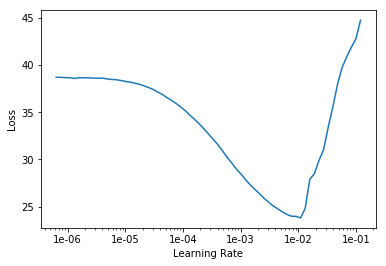

In [32]:
learn.lr_find()
learn.recorder.plot()

In [30]:
lr=5e-4

In [0]:
#learn.fit(lr, 1, cycle_len=12, use_clr=(20,10))
learn.fit_one_cycle(cyc_len=50, max_lr=lr)

epoch,train_loss,valid_loss,time
0,6.411302,10.054371,01:23
1,7.018110,9.715379,01:18
2,9.077241,9.847617,01:02
3,9.482083,9.584431,00:51
4,9.317714,9.536546,00:49
5,9.192128,9.450941,00:48
6,9.546196,9.680360,00:46
7,9.388327,9.046721,00:46
8,9.522371,9.391160,00:47
9,9.411379,8.910757,00:47


In [0]:
learn.save('initial')

In [0]:
learn.load('initial')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type Seq2SeqRNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


RNNLearner(data=Seq2SeqTextDataBunch;

Train: <__main__.Seq2SeqDataset object at 0x7f84e0c95160>;

Valid: <__main__.Seq2SeqDataset object at 0x7f84e0c95358>;

Test: None, model=Seq2SeqRNN(
  (emb_enc): Embedding(40004, 300, padding_idx=1)
  (emb_enc_drop): Dropout(p=0.15)
  (gru_enc): GRU(300, 256, num_layers=2, dropout=0.25)
  (out_enc): Linear(in_features=256, out_features=300, bias=False)
  (emb_dec): Embedding(40004, 300, padding_idx=1)
  (gru_dec): GRU(300, 300, num_layers=2, dropout=0.1)
  (out_drop): Dropout(p=0.35)
  (out): Linear(in_features=300, out_features=40004, bias=True)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.8, 0.99)), loss_func=<function seq2seq_loss at 0x7f84cb981a60>, metrics=[], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('data/translate'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True)], callbacks=[RNNTrainer
learn: RNNLearner(data=Seq2SeqTextDataBunch;


In [0]:
learn.fit_one_cycle(cyc_len=50, max_lr=lr)

epoch,train_loss,valid_loss,time
0,5.967715,6.327040,01:05
1,5.735187,6.103289,01:05
2,5.674162,6.013767,01:07
3,6.119915,6.210729,01:06
4,5.745633,6.237931,01:06
5,5.927518,6.266725,01:06
6,5.872571,6.055237,01:07
7,5.941336,6.194974,01:06
8,6.058371,6.803541,01:07
9,5.986291,6.643789,01:06


In [0]:
learn.save('after100')

### Test

In [42]:

sampler = SortSampler(val_ds.x, key=lambda t: len(val_ds[t][0].data))
collate_fn = partial(pad_collate, pad_idx=1, pad_first=False)
val_dl = DataLoader(val_ds, batch_size=bs, sampler=sampler,num_workers=0,collate_fn=collate_fn)

In [43]:
it = iter(val_dl)

In [50]:

x,y = next(it)
x = to_device(x, 'cuda:0')
y = to_device(y, 'cuda:0')
probs = learn.model(x)
preds = to_np(probs[0].data.max(2)[1].t())


for i in range(20,30):
    print(' '.join([body_itos[o] for o in x[i,:] if o != 1]))
    print(' '.join([title_itos[o] for o in y[i,:] if o != 1]))
    print(' '.join([title_itos[o] for o in preds[i,:] if o!=1]))
    print()

d:\tools\Anaconda3\envs\pytorch\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
d:\tools\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


there is an immediate need to deploy to staging , which would be an internet - accessible site that is as identical as possible to production except for data in the database . identical includes the way it 's deployed . the purpose in the short term at least is to be able to test and fix deploys without affecting production . because of the way we share environments on our production server , it 's not obvious how _unk can be made to deploy to different directories , without a lot of risky manual intervention . _eos_
how to use _unk to deploy to test / staging / training - type environments _eos_
deploy production for production _eos_ _eos_

when a user is invited to a board , and they visit the board page , they get a dialog with a ' accept ' button in it . if the user clicks that button , it makes a post request to ' https : / / _unk / resource / _unk / update / ' - along with this payload : _unk : / < username > / < _unk > / data : { options : { _unk : < _unk > , _unk : < _unk > } ,

In [45]:
for i in range(50,80):
    print(' '.join([body_itos[o] for o in x[i,:] if o != 1]))
    print(' '.join([title_itos[o] for o in y[i,:] if o != 1]))
    print(' '.join([title_itos[o] for o in preds[i,:] if o!=1]))
    print()

using the ontology search to add a restriction directly to a sheet : ! image https : / / cloud.githubusercontent.com / assets / 112839 / _unk / _unk choosing descendants = > an incomplete list of types and parts - 39 terms in total this term has 18 descendant classes dl query ‘ part _unk some _unk = > 58 classes 26 direct . choosing the subclasses instead = > 8 classes . also a mix of types and parts ! details here : https : / / docs.google.com / spreadsheets / d / _unk / edit?usp = sharing
bug with setting restrictions _eos_
_unk : of of of _unk _eos_ _eos_

1 . children 1 - 6 years / _unk 1 - 6 _unk 2 . children 7 - 12 years / _unk 7 - 12 _unk 3 . _unk 13 - 15 years / _unk 13 - 15 _unk 4 . _unk / _unk _unk 5 . _unk / _unk _unk 6 . _unk retarded / _unk _unk 7 . alzheimer ’s / _unk 8 . miscellaneous adults / _unk _unk 9 . _unk / _unk 10 . hunters / _unk 11 . climbers / _unk 12 . _unk / _unk 13 . _unk general / _unk _unk _eos_
_unk : add more categories _eos_
_unk _unk _unk _unk _unk _u

IndexError: index 64 is out of bounds for dimension 0 with size 64

> <ipython-input-45-f2d244cc7d2a>(2)<module>()
      1 for i in range(50,80):
----> 2     print(' '.join([body_itos[o] for o in x[i,:] if o != 1]))
      3     print(' '.join([title_itos[o] for o in y[i,:] if o != 1]))
      4     print(' '.join([title_itos[o] for o in preds[i,:] if o!=1]))
      5     print()

ipdb> c


## Bidir

In [0]:
class Seq2SeqRNN_Bidir(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25, bidirectional=True)
        self.out_enc = nn.Linear(nh*2, em_sz_dec, bias=False)
        self.drop_enc = nn.Dropout(0.05)
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data
        
    def forward(self, inp):
        inp = inp.t()
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = h.view(2,2,bs,-1).permute(0,2,1,3).contiguous().view(2,bs,-1)
        h = self.out_enc(self.drop_enc(h))

#         dec_inp = V(torch.zeros(bs).long())
        dec_inp = to_device(torch.zeros(bs).long(), 'cuda:0')
        res = []
        for i in range(self.out_sl):
            emb = self.emb_dec(dec_inp).unsqueeze(0)
            outp, h = self.gru_dec(emb, h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
#             dec_inp = V(outp.data.max(1)[1])
            dec_inp = outp.data.max(1)[1]
            if (dec_inp==1).all(): break
#  ugly hack, since rnn.py expects the true output to be in the first element      
#         return torch.stack(res)
        res = torch.stack(res)
        res = [res, res, res]
        return res
    
#     def initHidden(self, bs): return V(torch.zeros(self.nl*2, bs, self.nh))
    def initHidden(self, bs): return to_device(torch.zeros(self.nl*2, bs, self.nh), 'cuda:0')
  
    def reset(self):
      pass

In [0]:
rnn = Seq2SeqRNN_Bidir(body_vecd, body_itos, dim_body_vec, title_vecd, title_itos, dim_title_vec, nh, title_len_90, nl)
# learn = RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
# learn.crit = seq2seq_loss
learn=RNNLearner(md, rnn, opt_func=opt_fn,callback_fns=ShowGraph)
learn.loss_func = seq2seq_loss    

0 []
0 []


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


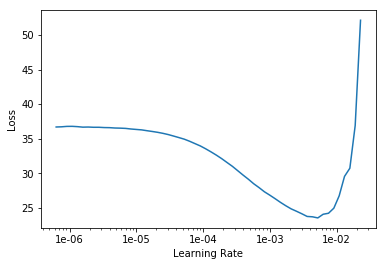

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=5e-4

epoch,train_loss,valid_loss,time
0,8.824606,9.357173,01:05
1,9.166949,9.039610,01:01
2,9.253172,9.053870,00:58
3,9.382486,9.118905,00:57
4,9.365967,9.069899,00:54
5,9.481003,8.965122,00:55
6,9.307871,8.984838,00:53
7,8.991921,8.818965,00:54
8,9.207253,9.145956,00:54
9,9.029139,8.750855,00:55


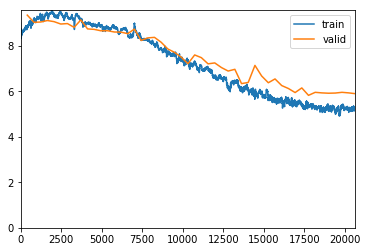

In [0]:
learn.fit_one_cycle(cyc_len=50, max_lr=lr)

In [0]:
learn.save('bidir-1')

epoch,train_loss,valid_loss,time
0,5.343189,5.932213,01:16
1,5.139027,5.886058,01:16
2,5.147011,5.879438,01:16
3,5.207165,5.939956,01:16
4,5.468967,6.165179,01:16
5,5.343695,6.426039,01:18
6,5.102518,5.645752,01:17
7,5.524774,5.924502,01:16
8,5.514299,6.781503,01:17
9,5.460674,5.841944,01:18


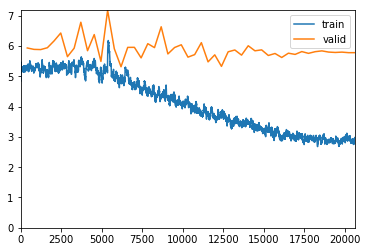

In [0]:
learn.fit_one_cycle(cyc_len=50, max_lr=lr)

In [0]:
learn.save('bidir-2')

epoch,train_loss,valid_loss,time
0,3.068279,5.880157,01:28
1,2.674492,5.779438,01:29
2,3.006237,5.796078,01:29
3,2.900012,5.740192,01:29
4,2.884200,5.927579,01:28
5,2.913537,5.821389,01:30
6,3.000583,5.853787,01:28
7,2.969688,5.870916,01:29
8,3.145876,5.763643,01:27
9,3.022150,5.730629,01:27


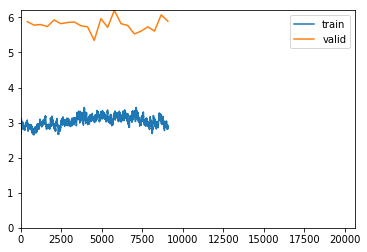

KeyboardInterrupt: ignored

> /usr/local/lib/python3.6/dist-packages/torch/autograd/__init__.py(90)backward()
     88     Variable._execution_engine.run_backward(
     89         tensors, grad_tensors, retain_graph, create_graph,
---> 90         allow_unreachable=True)  # allow_unreachable flag
     91 
     92 

ipdb> c


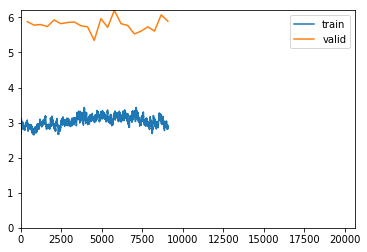

In [0]:
learn.fit_one_cycle(cyc_len=50, max_lr=lr)

In [0]:
learn.save('bidir-3')

## Teacher forcing

In [26]:
@dataclass
class PrForceUpdaterCallback(Callback):
    learn:Learner

    def on_epoch_begin(self, **kwargs):
#        pdb.set_trace()
        epoch = kwargs['epoch']
        max_runs_with_pr_force = 10
        self.learn.model.pr_force = (max_runs_with_pr_force-epoch)*(1.0/max_runs_with_pr_force) if epoch<max_runs_with_pr_force else 0
      
    def on_batch_begin(self, **kwargs):  
#         pdb.set_trace()
        self.learn.model.y_in_batch = kwargs['last_target'].t()

In [30]:
class Seq2SeqRNN_TeacherForcing(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25)
        self.out_enc = nn.Linear(nh, em_sz_dec, bias=False)
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data
        self.pr_force = 1.
        self.y_in_batch = None
        
    def forward(self, inp):
#         pdb.set_trace()
# transpose inp
        inp = inp.t()
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = self.out_enc(h)

#         dec_inp = V(torch.zeros(bs).long())
        dec_inp = to_device(torch.zeros(bs).long(), 'cuda:0')
        res = []
        for i in range(self.out_sl):
            emb = self.emb_dec(dec_inp).unsqueeze(0)
            outp, h = self.gru_dec(emb, h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
#             dec_inp = V(outp.data.max(1)[1])
            dec_inp = outp.data.max(1)[1]
            if (dec_inp==1).all(): break
            if (self.y_in_batch is not None) and (random.random()<self.pr_force):
                if i>=len(self.y_in_batch): break
                dec_inp = self.y_in_batch[i]
#         return torch.stack(res)
        res = torch.stack(res)
        res = [res, res, res]
        return res
    
#     def initHidden(self, bs): return V(torch.zeros(self.nl, bs, self.nh))
    def initHidden(self, bs): return to_device(torch.zeros(self.nl, bs, self.nh),'cuda:0')
  
    def reset(self):
      pass
    

In [31]:
# rnn = Seq2SeqRNN_TeacherForcing(fr_vecd, fr_itos, dim_fr_vec, en_vecd, en_itos, dim_en_vec, nh, enlen_90)
# learn = RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
# learn.crit = seq2seq_loss

rnn = Seq2SeqRNN_TeacherForcing(body_vecd, body_itos, dim_body_vec, title_vecd, title_itos, dim_title_vec, nh, title_len_90,nl)
learn=RNNLearner(md, rnn, opt_func=opt_fn,callback_fns=[ShowGraph, PrForceUpdaterCallback])
learn.loss_func = seq2seq_loss    

0 []
0 []


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


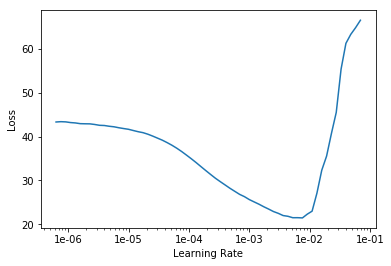

In [184]:
learn.lr_find()
learn.recorder.plot()

In [32]:
lr=5e-4

epoch,train_loss,valid_loss,time
0,4.900857,4.537313,04:34
1,5.447841,6.960493,04:16
2,6.220037,7.140869,03:49
3,6.705345,7.032690,03:29
4,7.133180,7.895955,03:20
5,7.370011,8.008861,03:09
6,7.790182,7.665424,03:08
7,8.176488,8.183355,02:57
8,8.240283,8.235775,02:52
9,8.624154,8.424122,02:42


d:\tools\Anaconda3\envs\pytorch\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


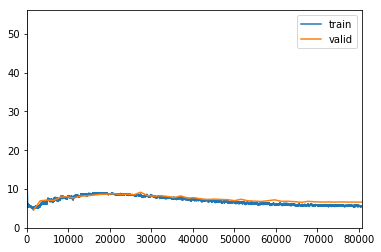

In [33]:
#learn.fit(lr, 1, cycle_len=12, use_clr=(20,10), stepper=Seq2SeqStepper)
learn.fit_one_cycle(cyc_len=50, max_lr=lr)

In [34]:
learn.save('forcing-1')

## Attentional model

In [27]:
def rand_t(*sz): return torch.randn(sz)/math.sqrt(sz[0])
def rand_p(*sz): return nn.Parameter(rand_t(*sz))

In [55]:
class Seq2SeqAttnRNN(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25)
        self.out_enc = nn.Linear(nh, em_sz_dec, bias=False)
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data

        self.W1 = rand_p(nh, em_sz_dec)
        self.l2 = nn.Linear(em_sz_dec, em_sz_dec)
        self.l3 = nn.Linear(em_sz_dec+nh, em_sz_dec)
        self.V = rand_p(em_sz_dec)
        
        self.y_in_batch = None

    def forward(self, inp, y=None, ret_attn=False):
# transpose inp
        inp = inp.t()
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = self.out_enc(h)

        pdb.set_trace()
#         dec_inp = V(torch.zeros(bs).long())
        dec_inp = to_device(torch.zeros(bs).long(), 'cuda:0')
#         dec_inp = to_device(torch.nn.Parameter(torch.zeros(bs).long()), 'cuda:0')
        res,attns = [],[]
        w1e = enc_out @ self.W1
        for i in range(self.out_sl):
            w2h = self.l2(h[-1])
            u = F.tanh(w1e + w2h)
            a = F.softmax(u @ self.V, 0)
            attns.append(a)
            Xa = (a.unsqueeze(2) * enc_out).sum(0)
            emb = self.emb_dec(dec_inp)
            wgt_enc = self.l3(torch.cat([emb, Xa], 1))
            
            outp, h = self.gru_dec(wgt_enc.unsqueeze(0), h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
#             dec_inp = V(outp.data.max(1)[1])
            dec_inp = outp.data.max(1)[1]
#             dec_inp = torch.nn.Parameter(outp.data.max(1)[1])
            if (dec_inp==1).all(): break
            if (self.y_in_batch is not None) and (random.random()<self.pr_force):
                if i>=len(self.y_in_batch): break
                dec_inp = self.y_in_batch[i]

        res = torch.stack(res)
        res = [res, res, res]
        if ret_attn: res = res,torch.stack(attns)
        return res

#     def initHidden(self, bs): return V(torch.zeros(self.nl, bs, self.nh))
    def initHidden(self, bs): return to_device(torch.zeros(self.nl, bs, self.nh),'cuda:0')
#     def initHidden(self, bs): return to_device(torch.nn.Parameter(torch.zeros(self.nl, bs, self.nh)),'cuda:0')
  
    def reset(self):
      pass
    

In [56]:
# rnn = Seq2SeqAttnRNN(fr_vecd, fr_itos, dim_fr_vec, en_vecd, en_itos, dim_en_vec, nh, enlen_90)
# learn = RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
# learn.crit = seq2seq_loss
rnn = Seq2SeqAttnRNN(body_vecd, body_itos, dim_body_vec, title_vecd, title_itos, dim_title_vec, nh, title_len_90,nl)
#learn=RNNLearner(md, rnn, opt_func=opt_fn,callback_fns=[ShowGraph, PrForceUpdaterCallback])
learn=RNNLearner(md, rnn, opt_func=opt_fn,callback_fns=[ShowGraph])
learn.loss_func = seq2seq_loss    

0 []
0 []


In [62]:
learn.lr_find()
learn.recorder.plot()

d:\tools\Anaconda3\envs\pytorch\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


> <ipython-input-55-f10b2ad68542>(33)forward()
-> dec_inp = to_device(torch.zeros(bs).long(), 'cuda:0')
(Pdb) l
 28  	        enc_out, h = self.gru_enc(emb, h)
 29  	        h = self.out_enc(h)
 30  	
 31  	        pdb.set_trace()
 32  	#         dec_inp = V(torch.zeros(bs).long())
 33  ->	        dec_inp = to_device(torch.zeros(bs).long(), 'cuda:0')
 34  	#         dec_inp = to_device(torch.nn.Parameter(torch.zeros(bs).long()), 'cuda:0')
 35  	        res,attns = [],[]
 36  	        w1e = enc_out @ self.W1
 37  	        for i in range(self.out_sl):
 38  	            w2h = self.l2(h[-1])
(Pdb) n
> <ipython-input-55-f10b2ad68542>(35)forward()
-> res,attns = [],[]
(Pdb) 
> <ipython-input-55-f10b2ad68542>(36)forward()
-> w1e = enc_out @ self.W1
(Pdb) 
> <ipython-input-55-f10b2ad68542>(37)forward()
-> for i in range(self.out_sl):
(Pdb) 
> <ipython-input-55-f10b2ad68542>(38)forward()
-> w2h = self.l2(h[-1])
(Pdb) 
> <ipython-input-55-f10b2ad68542>(39)forward()
-> u = F.tanh(w1e + w2h)
(Pdb)

d:\tools\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


> <ipython-input-55-f10b2ad68542>(40)forward()
-> a = F.softmax(u @ self.V, 0)
(Pdb) 
> <ipython-input-55-f10b2ad68542>(41)forward()
-> attns.append(a)
(Pdb) 
> <ipython-input-55-f10b2ad68542>(42)forward()
-> Xa = (a.unsqueeze(2) * enc_out).sum(0)
(Pdb) 
> <ipython-input-55-f10b2ad68542>(43)forward()
-> emb = self.emb_dec(dec_inp)
(Pdb) 
> <ipython-input-55-f10b2ad68542>(44)forward()
-> wgt_enc = self.l3(torch.cat([emb, Xa], 1))
(Pdb) p Xa.size()
torch.Size([64, 128])
(Pdb) p emb.size()
torch.Size([64, 300])
(Pdb) p enc_out.size()
torch.Size([99, 64, 128])
(Pdb) p a
tensor([[0.0088, 0.0101, 0.0099,  ..., 0.0084, 0.0095, 0.0095],
        [0.0077, 0.0094, 0.0095,  ..., 0.0075, 0.0086, 0.0088],
        [0.0076, 0.0102, 0.0087,  ..., 0.0080, 0.0087, 0.0088],
        ...,
        [0.0124, 0.0097, 0.0108,  ..., 0.0091, 0.0126, 0.0108],
        [0.0112, 0.0084, 0.0105,  ..., 0.0090, 0.0129, 0.0101],
        [0.0118, 0.0087, 0.0096,  ..., 0.0091, 0.0108, 0.0102]],
       device='cuda:0', grad_

BdbQuit: 

> d:\tools\anaconda3\envs\pytorch\lib\bdb.py(70)dispatch_line()
     68         if self.stop_here(frame) or self.break_here(frame):
     69             self.user_line(frame)
---> 70             if self.quitting: raise BdbQuit
     71         return self.trace_dispatch
     72 

ipdb> q


In [59]:
lr=6e-4

epoch,train_loss,valid_loss,time
0,9.638729,9.585742,08:46
1,9.353812,9.022728,08:00
2,9.415967,8.926170,07:55
3,8.920947,8.644317,08:26
4,8.649264,8.178968,08:52
5,8.403473,8.256416,09:11
6,8.254729,7.985465,09:29
7,7.979084,7.975975,09:46
8,7.822968,7.710956,09:57
9,8.101272,7.733490,10:04


d:\tools\Anaconda3\envs\pytorch\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
d:\tools\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


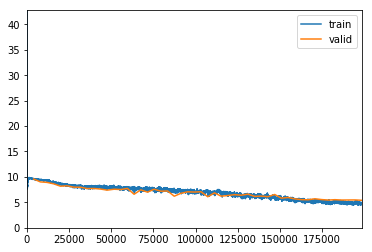

In [39]:
# learn.fit(lr, 1, cycle_len=15, use_clr=(20,10), stepper=Seq2SeqStepper)
learn.fit_one_cycle(cyc_len=50, max_lr=lr)

In [40]:
learn.save('attn-50')

In [38]:
learn.load('attn-50')

d:\tools\Anaconda3\envs\pytorch\lib\site-packages\torch\serialization.py:251: UserWarning: Couldn't retrieve source code for container of type Seq2SeqAttnRNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


RNNLearner(data=Seq2SeqTextDataBunch;

Train: <__main__.Seq2SeqDataset object at 0x000001751774D470>;

Valid: <__main__.Seq2SeqDataset object at 0x000001751774D438>;

Test: None, model=Seq2SeqAttnRNN(
  (emb_enc): Embedding(40004, 300, padding_idx=1)
  (gru_enc): GRU(300, 128, num_layers=2, dropout=0.25)
  (out_enc): Linear(in_features=128, out_features=300, bias=False)
  (emb_dec): Embedding(40004, 300, padding_idx=1)
  (gru_dec): GRU(300, 300, num_layers=2, dropout=0.1)
  (emb_enc_drop): Dropout(p=0.15)
  (out_drop): Dropout(p=0.35)
  (out): Linear(in_features=300, out_features=40004, bias=True)
  (l2): Linear(in_features=300, out_features=300, bias=True)
  (l3): Linear(in_features=428, out_features=300, bias=True)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.8, 0.99)), loss_func=<function seq2seq_loss at 0x0000017523841620>, metrics=[], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=WindowsPath('data/translate'), model_dir='models', callback_fns=[f

epoch,train_loss,valid_loss,time
0,4.991679,5.531359,13:46
1,4.809300,5.502222,13:49
2,4.950780,5.533848,13:34
3,4.571059,5.493266,14:02
4,4.772600,5.631424,13:53
5,4.909251,5.440450,13:39
6,4.746326,5.767180,13:37
7,5.305796,5.871752,13:33
8,4.995747,5.573273,13:29
9,5.080386,5.749509,13:40


d:\tools\Anaconda3\envs\pytorch\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
d:\tools\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


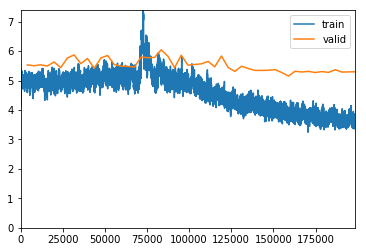

In [39]:
learn.fit_one_cycle(cyc_len=50, max_lr=lr)

In [40]:
learn.save('attn-100')

Attention with Beam search

In [48]:
def to_gpu(v):
    return to_device(v, 'cuda:0')

In [69]:
class Seq2SeqAttnRNNWithBeam(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2, beam=False, s=2):
        super().__init__()
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25)
        self.out_enc = nn.Linear(nh, em_sz_dec, bias=False)
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data

        self.W1 = rand_p(nh, em_sz_dec)
        self.l2 = nn.Linear(em_sz_dec, em_sz_dec)
        self.l3 = nn.Linear(em_sz_dec+nh, em_sz_dec)
        self.V = rand_p(em_sz_dec)
        
        self.beam = beam
        self.s = s
        self.y_in_batch = None

    def forward(self, inp, y=None, ret_attn=False):
# transpose inp
        inp = inp.t()
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = self.out_enc(h)

        pdb.set_trace()
#         dec_inp = V(torch.zeros(bs).long())
        dec_inp = to_device(torch.zeros(bs).long(), 'cuda:0')
#         dec_inp = to_device(torch.nn.Parameter(torch.zeros(bs).long()), 'cuda:0')
        res,attns = [],[]
        w1e = enc_out @ self.W1
        cur_probs = None
        s = self.s
        for i in range(self.out_sl):
            if self.beam:
                if i==0:
                    cur_probs = to_gpu(torch.zeros(bs, s))
                    # calculate the topk probs for the current word
                    cur_w_topk_p, cur_w_topk_i, h = self._get_new_topk_h(w1e, enc_out, dec_inp, h, s, attns=attns)
                    
                    # calculate the new topk probs for the entire sequence
                    cur_probs += cur_w_topk_p.log_()
                    
                    # prepare dec_inp and h for next iteration
                    dec_inp = cur_w_topk_i.t().contiguous().view(-1)
                    h = h.repeat(s,1,1)
                    res = cur_w_topk_i.view(bs,1,-1)
                    
                    # expand w1e and enc_out
                    w1e, enc_out = w1e.repeat(s,1,1), enc_out.repeat(s,1,1)
                else:
                    # calculate the topk probs for the current word
                    cur_w_topk_p, cur_w_topk_i, h = self._get_new_topk_h(w1e, enc_out, dec_inp, h, s, attns=attns)
                    cur_w_topk_p, cur_w_topk_i = torch.cat(cur_w_topk_p.view(s, bs, s), 1), torch.cat(cur_w_topk_i.view(s, bs, s), 1)
                    
                    # calculate the new topk probs for the entire sequence
                    cur_probs = cur_probs.repeat(1,s) + cur_w_topk_p.log_()
                    cur_probs, cur_topk_idxes = cur_probs.topk(s,dim=1)
                    
                    # select topk prev results based on updated topk probs
                    old_res_idxes = cur_topk_idxes / s
                    new_res = []
                    for k in range(s):
                        new_res.append(res.gather(2, old_res_idxes[:,k:k+1].expand(bs, res.shape[1]).unsqueeze(-1)))
                    res = torch.cat(new_res, dim=2)
                    
                    # select topk new words based on updated topk probs
                    cur_w_topk_id = cur_w_topk_i.gather(1, cur_topk_idxes)
                    
                    # concat new words onto the topk seqs
                    res = torch.cat((res, cur_w_topk_id.unsqueeze(1)), dim=1)
                    
                    # prepare dec_inp and h for next iteration
                    dec_inp = cur_w_topk_id.t().contiguous().view(-1)
                    h_idxes = to_gpu(torch.arange(bs)).long().repeat(s) + old_res_idxes.t().contiguous().view(-1) * bs
                    h.data = h.data.index_select(1,h_idxes)
            else:
                w2h = self.l2(h[-1])
                u = F.tanh(w1e + w2h)
                a = F.softmax(u @ self.V, 0)
                attns.append(a)
                Xa = (a.unsqueeze(2) * enc_out).sum(0)
                emb = self.emb_dec(dec_inp)
                wgt_enc = self.l3(torch.cat([emb, Xa], 1))

                outp, h = self.gru_dec(wgt_enc.unsqueeze(0), h)
                outp = self.out(self.out_drop(outp[0]))
                res.append(outp)
#             dec_inp = V(outp.data.max(1)[1])
                dec_inp = outp.data.max(1)[1]
#             dec_inp = torch.nn.Parameter(outp.data.max(1)[1])

            if (dec_inp==1).all(): break
            if (self.y_in_batch is not None) and (random.random()<self.pr_force):
                if i>=len(self.y_in_batch): break
                dec_inp = self.y_in_batch[i]

        res = torch.stack(res)
        res = [res, res, res]
        if ret_attn: res = res,torch.stack(attns)
        return res

    def _get_new_topk_h(self, w1e, enc_out, dec_inp, h, s, attns=None):
        w2h = self.l2(h[-1])
        u = F.tanh(w1e + w2h)
        a = F.softmax(u @ self.V, 0)
        if attns:
            attns.append(a)
        Xa = (a.unsqueeze(2) * enc_out).sum(0)

        emb = self.emb_enc(dec_inp)
        wgt_enc = self.l3(torch.cat([emb, Xa], 1))
        outp, h = self.gru_dec(wgt_enc.unsqueeze(0), h)
        outp = self.out(self.out_drop(outp[0]))
        outp = F.softmax(outp, dim=1)
        
        return (*outp.data.topk(s, dim=1), h)

#     def initHidden(self, bs): return V(torch.zeros(self.nl, bs, self.nh))
    def initHidden(self, bs): return to_device(torch.zeros(self.nl, bs, self.nh),'cuda:0')
#     def initHidden(self, bs): return to_device(torch.nn.Parameter(torch.zeros(self.nl, bs, self.nh)),'cuda:0')
  
    def reset(self):
      pass
    

In [70]:
# rnn = Seq2SeqAttnRNN(fr_vecd, fr_itos, dim_fr_vec, en_vecd, en_itos, dim_en_vec, nh, enlen_90)
# learn = RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
# learn.crit = seq2seq_loss
rnn = Seq2SeqAttnRNNWithBeam(body_vecd, body_itos, dim_body_vec, title_vecd, title_itos, dim_title_vec, nh, title_len_90,nl, True, 2)
learn=RNNLearner(md, rnn, opt_func=opt_fn,callback_fns=[ShowGraph, PrForceUpdaterCallback])
# learn=RNNLearner(md, rnn, opt_func=opt_fn,callback_fns=[ShowGraph])
learn.loss_func = seq2seq_loss    

0 []
0 []


In [71]:
learn.lr_find()
learn.recorder.plot()

d:\tools\Anaconda3\envs\pytorch\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


> <ipython-input-69-0529ce6a1ce2>(35)forward()
-> dec_inp = to_device(torch.zeros(bs).long(), 'cuda:0')
(Pdb) c


d:\tools\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: Expected hidden size (2, 64, 300), got (4, 64, 300)

> d:\tools\anaconda3\envs\pytorch\lib\site-packages\torch\nn\modules\rnn.py(148)check_hidden_size()
    146         def check_hidden_size(hx, expected_hidden_size, msg='Expected hidden size {}, got {}'):
    147             if tuple(hx.size()) != expected_hidden_size:
--> 148                 raise RuntimeError(msg.format(expected_hidden_size, tuple(hx.size())))
    149 
    150         if self.mode == 'LSTM':

ipdb> where
  <ipython-input-71-5aa600e31cfe>(1)<module>()
----> 1 learn.lr_find()
      2 learn.recorder.plot()

  d:\tools\anaconda3\envs\pytorch\lib\site-packages\fastai\train.py(32)lr_find()
     30     cb = LRFinder(learn, start_lr, end_lr, num_it, stop_div)
     31     epochs = int(np.ceil(num_it/len(learn.data.train_dl)))
---> 32     learn.fit(epochs, start_lr, callbacks=[cb], wd=wd)
     33 
     34 def to_fp16(learn:Learner, loss_scale:float=None, max_noskip:int=1000, dynamic:bool=True, clip:float=None,

  d:\tools\anaconda3\envs\pytorch\lib\site-packages\fastai\basic_tr

In [ ]:
learn.fit_one_cycle(cyc_len=50, max_lr=lr)

In [ ]:
learn.save('attn-beam-100')

### Test

In [41]:
x,y = next(iter(val_dl))
probs,attns = learn.model(V(x),ret_attn=True)
preds = to_np(probs.max(2)[1])

NameError: name 'val_dl' is not defined

> <ipython-input-41-4ad0dc30a418>(1)<module>()
----> 1 x,y = next(iter(val_dl))
      2 probs,attns = learn.model(V(x),ret_attn=True)
      3 preds = to_np(probs.max(2)[1])

ipdb> c


In [0]:
for i in range(180,190):
    print(' '.join([fr_itos[o] for o in x[:,i] if o != 1]))
    print(' '.join([en_itos[o] for o in y[:,i] if o != 1]))
    print(' '.join([en_itos[o] for o in preds[:,i] if o!=1]))
    print()

quels facteurs pourraient influer sur le choix de leur emplacement ? _eos_
what factors influencetheir location ? _eos_
what factors might influence the their their their ? _eos_

qu’ est -ce qui ne peut pas changer ? _eos_
what can not change ? _eos_
what can not change change ? _eos_

que faites - vous ? _eos_
what do you do ? _eos_
what do you do ? _eos_

qui réglemente les pylônes d' antennes ? _eos_
who regulates antenna towers ? _eos_
who regulates the lights ? ? _eos_

où sont - ils situés ? _eos_
where are they located ? _eos_
where are they located ? _eos_

quelles sont leurs compétences ? _eos_
what are their qualifications ? _eos_
what are their skills ? _eos_

qui est victime de harcèlement sexuel ? _eos_
who experiences sexual harassment ? _eos_
who is victim sexual sexual ? _eos_

quelles sont les personnes qui visitent les communautés autochtones ? _eos_
who visits indigenous communities ? _eos_
who is people people aboriginal people ? _eos_

pourquoi ces trois points en

In [0]:
attn = to_np(attns[...,180])

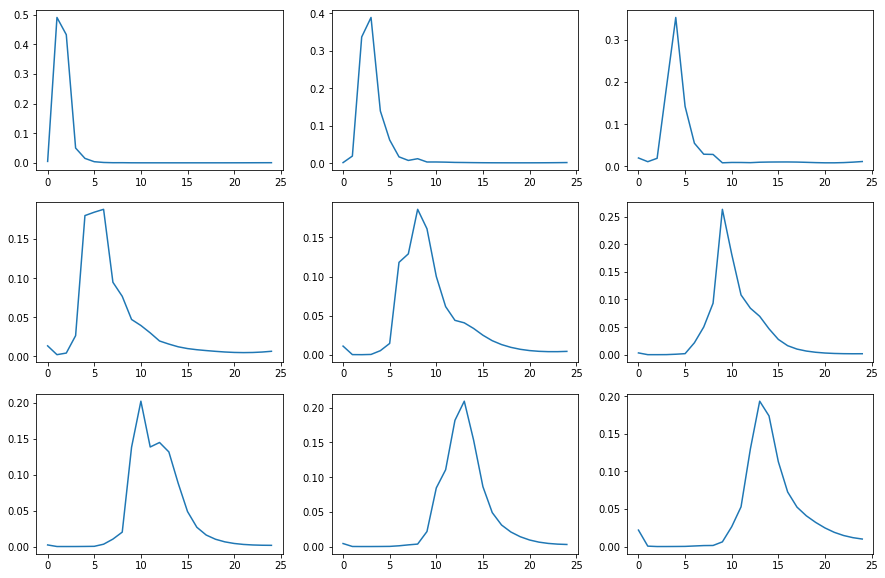

In [0]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i,ax in enumerate(axes.flat):
    ax.plot(attn[i])

## All

In [0]:
class Seq2SeqRNN_All(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25, bidirectional=True)
        self.out_enc = nn.Linear(nh*2, em_sz_dec, bias=False)
        self.drop_enc = nn.Dropout(0.25)
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data

        self.W1 = rand_p(nh*2, em_sz_dec)
        self.l2 = nn.Linear(em_sz_dec, em_sz_dec)
        self.l3 = nn.Linear(em_sz_dec+nh*2, em_sz_dec)
        self.V = rand_p(em_sz_dec)

    def forward(self, inp, y=None):
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = h.view(2,2,bs,-1).permute(0,2,1,3).contiguous().view(2,bs,-1)
        h = self.out_enc(self.drop_enc(h))

        dec_inp = V(torch.zeros(bs).long())
        res,attns = [],[]
        w1e = enc_out @ self.W1
        for i in range(self.out_sl):
            w2h = self.l2(h[-1])
            u = F.tanh(w1e + w2h)
            a = F.softmax(u @ self.V, 0)
            attns.append(a)
            Xa = (a.unsqueeze(2) * enc_out).sum(0)
            emb = self.emb_dec(dec_inp)
            wgt_enc = self.l3(torch.cat([emb, Xa], 1))
            
            outp, h = self.gru_dec(wgt_enc.unsqueeze(0), h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
            dec_inp = V(outp.data.max(1)[1])
            if (dec_inp==1).all(): break
            if (y is not None) and (random.random()<self.pr_force):
                if i>=len(y): break
                dec_inp = y[i]
        return torch.stack(res)

    def initHidden(self, bs): return V(torch.zeros(self.nl*2, bs, self.nh))

In [0]:
rnn = Seq2SeqRNN_All(fr_vecd, fr_itos, dim_fr_vec, en_vecd, en_itos, dim_en_vec, nh, enlen_90)
learn = RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
learn.crit = seq2seq_loss

In [0]:
learn.fit(lr, 1, cycle_len=15, use_clr=(20,10), stepper=Seq2SeqStepper)

A Jupyter Widget

epoch      trn_loss   val_loss                              
    0      3.817306   7.527982  
    1      3.239813   5.82099                               
    2      3.06717    5.437195                              
    3      3.077923   4.718295                              
    4      2.952973   4.337892                              
    5      3.018182   3.994012                              
    6      2.761607   3.777056                              
    7      2.913683   3.595531                              
    8      2.91521    3.46984                               
    9      2.921533   3.370839                              
    10     2.913826   3.336167                              
    11     2.746896   3.37274                               
    12     2.695839   3.332427                              
    13     2.531583   3.341861                              
    14     2.524642   3.324184                              



[3.3241842]

### Test

In [0]:
x,y = next(iter(val_dl))
probs = learn.model(V(x))
preds = to_np(probs.max(2)[1])

for i in range(180,190):
    print(' '.join([fr_itos[o] for o in x[:,i] if o != 1]))
    print(' '.join([en_itos[o] for o in y[:,i] if o != 1]))
    print(' '.join([en_itos[o] for o in preds[:,i] if o!=1]))
    print()

quels facteurs pourraient influer sur le choix de leur emplacement ? _eos_
what factors influencetheir location ? _eos_
what factors might affect the choice of their ? ? _eos_

qu’ est -ce qui ne peut pas changer ? _eos_
what can not change ? _eos_
what can not change change _eos_

que faites - vous ? _eos_
what do you do ? _eos_
what do you do ? _eos_

qui réglemente les pylônes d' antennes ? _eos_
who regulates antenna towers ? _eos_
who regulates the antenna ? ? _eos_

où sont - ils situés ? _eos_
where are they located ? _eos_
where are they located ? _eos_

quelles sont leurs compétences ? _eos_
what are their qualifications ? _eos_
what are their skills ? _eos_

qui est victime de harcèlement sexuel ? _eos_
who experiences sexual harassment ? _eos_
who is victim harassment harassment ? _eos_

quelles sont les personnes qui visitent les communautés autochtones ? _eos_
who visits indigenous communities ? _eos_
who are the people people ? ?

pourquoi ces trois points en particulier 